In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
from pandas_datareader import data as pdr
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
import statsmodels.api as sm
from sklearn.metrics import r2_score
from fastai.tabular.all import add_datepart
from sklearn.preprocessing import LabelEncoder

In [2]:
# !pip install fastai # pip install directly

In [3]:
#Installing pmdarima package
# get_ipython().system('pip install pmdarima')

In [4]:
#Read the sales dataset
# sales_data = pd.read_csv("Champagne Sales.csv")

In [5]:
# read the stock data
yf.pdr_override()
data = pdr.get_data_yahoo("MSFT", start="2022-05-19", end="2023-05-20")
data # there are 252 trading days in last year

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716522,32692300
2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300
2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154633,33175400
2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134460,29043900
2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006714,28547900
...,...,...,...,...,...,...
2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500
2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300
2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000


In [6]:
df = data.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716522,32692300
1,2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300
2,2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154633,33175400
3,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134460,29043900
4,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006714,28547900
...,...,...,...,...,...,...,...
247,2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500
248,2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300
249,2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000
250,2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000


In [7]:
add_datepart(df, 'Date', drop=False)

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716507,32692300,2022,5,20,19,3,139,False,False,False,False,False,False,1.652918e+09
1,2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300,2022,5,20,20,4,140,False,False,False,False,False,False,1.653005e+09
2,2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154602,33175400,2022,5,21,23,0,143,False,False,False,False,False,False,1.653264e+09
3,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134491,29043900,2022,5,21,24,1,144,False,False,False,False,False,False,1.653350e+09
4,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006683,28547900,2022,5,21,25,2,145,False,False,False,False,False,False,1.653437e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500,2023,5,20,15,0,135,False,False,False,False,False,False,1.684109e+09
248,2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300,2023,5,20,16,1,136,False,False,False,False,False,False,1.684195e+09
249,2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000,2023,5,20,17,2,137,False,False,False,False,False,False,1.684282e+09
250,2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,2023,5,20,18,3,138,False,False,False,False,False,False,1.684368e+09


In [8]:
df.drop('Elapsed', axis=1, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716507,32692300,2022,5,20,19,3,139,False,False,False,False,False,False
1,2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300,2022,5,20,20,4,140,False,False,False,False,False,False
2,2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154602,33175400,2022,5,21,23,0,143,False,False,False,False,False,False
3,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134491,29043900,2022,5,21,24,1,144,False,False,False,False,False,False
4,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006683,28547900,2022,5,21,25,2,145,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500,2023,5,20,15,0,135,False,False,False,False,False,False
248,2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300,2023,5,20,16,1,136,False,False,False,False,False,False
249,2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000,2023,5,20,17,2,137,False,False,False,False,False,False
250,2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,2023,5,20,18,3,138,False,False,False,False,False,False


In [9]:
# Change all column headings to be lower case, and remove spacing
df.columns = [str(x).lower().replace(' ', '_') for x in df.columns]
df

,date,open,high,low,close,adj_close,volume,year,month,week,day,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start
0,2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716507,32692300,2022,5,20,19,3,139,False,False,False,False,False,False
1,2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300,2022,5,20,20,4,140,False,False,False,False,False,False
2,2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154602,33175400,2022,5,21,23,0,143,False,False,False,False,False,False
3,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134491,29043900,2022,5,21,24,1,144,False,False,False,False,False,False
4,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006683,28547900,2022,5,21,25,2,145,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500,2023,5,20,15,0,135,False,False,False,False,False,False
248,2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300,2023,5,20,16,1,136,False,False,False,False,False,False
249,2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000,2023,5,20,17,2,137,False,False,False,False,False,False
250,2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,2023,5,20,18,3,138,False,False,False,False,False,False


In [10]:
# Convert year to categorical feature, based on alphabetical order
df.loc[:, 'year'] = LabelEncoder().fit_transform(df['year'])
df

,date,open,high,low,close,adj_close,volume,year,month,week,day,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start
0,2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716507,32692300,0,5,20,19,3,139,False,False,False,False,False,False
1,2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300,0,5,20,20,4,140,False,False,False,False,False,False
2,2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154602,33175400,0,5,21,23,0,143,False,False,False,False,False,False
3,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134491,29043900,0,5,21,24,1,144,False,False,False,False,False,False
4,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006683,28547900,0,5,21,25,2,145,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500,1,5,20,15,0,135,False,False,False,False,False,False
248,2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300,1,5,20,16,1,136,False,False,False,False,False,False
249,2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000,1,5,20,17,2,137,False,False,False,False,False,False
250,2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,1,5,20,18,3,138,False,False,False,False,False,False


## EDA for XGBoost

In [11]:
# Count number of nulls for each column
df.isnull().sum(axis=0)

date                0
open                0
high                0
low                 0
close               0
adj_close           0
volume              0
year                0
month               0
week                0
day                 0
dayofweek           0
dayofyear           0
is_month_end        0
is_month_start      0
is_quarter_end      0
is_quarter_start    0
is_year_end         0
is_year_start       0
dtype: int64

<Axes: xlabel='month'>

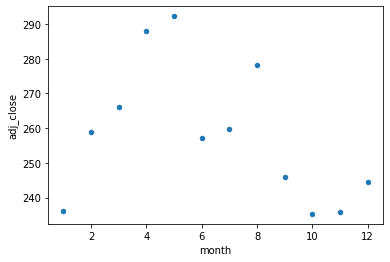

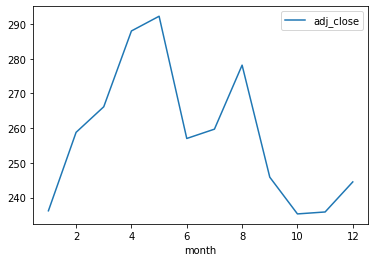

In [12]:
# Compute the average price for each month
avg_price_mth = df.groupby("month").agg({'adj_close': 'mean'}).reset_index()
# avg_price_mth
avg_price_mth.plot.scatter(x = 'month', y = 'adj_close')
avg_price_mth.plot(x = 'month', y = 'adj_close')
# plt.legend('best')
# # Plot 
# data = [go.Scatter(
#             x = avg_price_mth['month'],
#             y = avg_price_mth['adj_close'],
#             mode = 'markers',
#             marker=dict(
#                 color='LightSkyBlue',
#                 size=15,
#                 line=dict(
#                 color='MediumPurple',
#                 width=2
#                 ))
#         )]

# layout = dict(xaxis = dict(title = 'month'),
#               yaxis = dict(title = 'average adjusted closing price (USD)'))

# fig = dict(data=data, layout=layout)
# py.iplot(fig, filename='StockPricePrediction_v6d_avg_price_mth')

In [14]:
# Compute the average price for each day of week
avg_price_dayofweek = df.groupby("dayofweek").agg({'adj_close': 'mean'}).reset_index()
avg_price_dayofweek

,dayofweek,adj_close
0,0,258.983973
1,1,257.141786
2,2,258.235286
3,3,259.486383
4,4,258.602336


In [13]:
def add_lags(df, N, lag_cols):
    """
    Add lags up to N number of days to use as features
    The lag columns are labelled as 'adj_close_lag_1', 'adj_close_lag_2', ... etc.
    """
    # Use lags up to N number of days to use as features
    df_w_lags = df.copy()
    df_w_lags.loc[:, 'order_day'] = [x for x in list(range(len(df)))] # Add a column 'order_day' to indicate the order of the rows by date
    merging_keys = ['order_day'] # merging_keys
    shift_range = [x+1 for x in range(N)]
    for shift in shift_range:
        train_shift = df_w_lags[merging_keys + lag_cols].copy()
    
        # E.g. order_day of 0 becomes 1, for shift = 1.
        # So when this is merged with order_day of 1 in df_w_lags, this will represent lag of 1.
        train_shift['order_day'] = train_shift['order_day'] + shift
    
        foo = lambda x: '{}_lag_{}'.format(x, shift) if x in lag_cols else x
        train_shift = train_shift.rename(columns=foo)

        df_w_lags = pd.merge(df_w_lags, train_shift, on=merging_keys, how='left') # .fillna(0)
    del train_shift
    
    return df_w_lags

In [14]:
# Create lags 
df_lags = add_lags(df, 10, ['adj_close'])
df_lags

,date,open,high,low,close,adj_close,volume,year,month,week,...,adj_close_lag_1,adj_close_lag_2,adj_close_lag_3,adj_close_lag_4,adj_close_lag_5,adj_close_lag_6,adj_close_lag_7,adj_close_lag_8,adj_close_lag_9,adj_close_lag_10
0,2022-05-19,253.899994,257.670013,251.880005,253.139999,250.716507,32692300,0,5,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-05-20,257.239990,258.540009,246.440002,252.559998,250.142075,39199300,0,5,20,...,250.716507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-05-23,255.490005,261.500000,253.429993,260.649994,258.154602,33175400,0,5,21,...,250.142075,250.716507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-05-24,257.890015,261.329987,253.500000,259.619995,257.134491,29043900,0,5,21,...,258.154602,250.142075,250.716507,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-05-25,258.140015,264.579987,257.130005,262.519989,260.006683,28547900,0,5,21,...,257.134491,258.154602,250.142075,250.716507,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2023-05-15,309.100006,309.899994,307.589996,309.459991,308.784973,16336500,1,5,20,...,308.296051,309.433533,311.628754,306.330353,307.976746,309.972382,304.743805,303.736023,304.743805,304.893494
248,2023-05-16,309.829987,313.709991,309.829987,311.739990,311.059998,26730300,1,5,20,...,308.784973,308.296051,309.433533,311.628754,306.330353,307.976746,309.972382,304.743805,303.736023,304.743805
249,2023-05-17,312.290009,314.429993,310.739990,314.000000,314.000000,24315000,1,5,20,...,311.059998,308.784973,308.296051,309.433533,311.628754,306.330353,307.976746,309.972382,304.743805,303.736023
250,2023-05-18,314.529999,319.040009,313.720001,318.519989,318.519989,27276000,1,5,20,...,314.000000,311.059998,308.784973,308.296051,309.433533,311.628754,306.330353,307.976746,309.972382,304.743805


In [15]:
# Compute correlation
features = [
        'adj_close',
        'year',
        'month',
        'week',
        'day',
        'dayofweek',
        'dayofyear',
        'is_month_end',
        'is_month_start',
        'is_quarter_end',
        'is_quarter_start',
#         'is_year_end',
#         'is_year_start'
]
for n in range(10,0,-1):
    features.append("adj_close_lag_"+str(n))
        
corr_matrix = df_lags[features].corr()
# corr_matrix["adj_close"].sort_values(ascending=False)
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,adj_close,year,month,week,day,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start,adj_close_lag_10,adj_close_lag_9,adj_close_lag_8,adj_close_lag_7,adj_close_lag_6,adj_close_lag_5,adj_close_lag_4,adj_close_lag_3,adj_close_lag_2,adj_close_lag_1
adj_close,1.00,0.39,-0.32,-0.33,-0.06,0.01,-0.33,-0.04,0.02,-0.00,-0.00,0.76,0.78,0.80,0.83,0.85,0.87,0.89,0.91,0.94,0.97
year,0.39,1.00,-0.84,-0.84,-0.08,-0.01,-0.84,-0.02,-0.02,-0.01,-0.05,0.23,0.25,0.26,0.28,0.29,0.31,0.33,0.34,0.36,0.38
month,-0.32,-0.84,1.00,1.00,0.00,-0.00,1.00,-0.02,0.03,-0.02,0.01,-0.20,-0.21,-0.22,-0.23,-0.24,-0.26,-0.27,-0.28,-0.30,-0.31
week,-0.33,-0.84,1.00,1.00,0.08,-0.02,1.00,0.00,-0.00,-0.00,-0.00,-0.20,-0.21,-0.22,-0.24,-0.25,-0.26,-0.28,-0.29,-0.31,-0.32
day,-0.06,-0.08,0.00,0.08,1.00,-0.01,0.08,0.32,-0.32,0.18,-0.11,0.01,0.01,-0.00,-0.01,-0.02,-0.03,-0.03,-0.06,-0.08,-0.08
dayofweek,0.01,-0.01,-0.00,-0.02,-0.01,1.00,-0.00,-0.01,-0.02,0.13,0.09,0.03,0.03,-0.01,-0.03,-0.00,0.01,0.00,-0.03,-0.03,-0.00
dayofyear,-0.33,-0.84,1.00,1.00,0.08,-0.00,1.00,0.00,-0.00,-0.00,-0.00,-0.20,-0.21,-0.23,-0.24,-0.25,-0.26,-0.28,-0.29,-0.31,-0.32
is_month_end,-0.04,-0.02,-0.02,0.00,0.32,-0.01,0.00,1.00,-0.04,0.57,-0.01,-0.01,-0.03,-0.04,-0.05,-0.04,-0.03,-0.02,-0.05,-0.06,-0.05
is_month_start,0.02,-0.02,0.03,-0.00,-0.32,-0.02,-0.00,-0.04,1.00,-0.02,0.33,0.00,-0.00,-0.01,-0.01,-0.00,0.01,-0.03,-0.02,0.01,0.02
is_quarter_end,-0.00,-0.01,-0.02,-0.00,0.18,0.13,-0.00,0.57,-0.02,1.00,-0.01,0.00,-0.02,-0.02,-0.02,-0.01,0.00,0.01,-0.00,-0.00,0.00


In [16]:
# Plot correlation for lag features only In[1085]
features = ['adj_close']
for n in range(1, 11, 1):
    features.append("adj_close_lag_"+str(n))
        
corr_matrix = df_lags[features].corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)

,adj_close,adj_close_lag_1,adj_close_lag_2,adj_close_lag_3,adj_close_lag_4,adj_close_lag_5,adj_close_lag_6,adj_close_lag_7,adj_close_lag_8,adj_close_lag_9,adj_close_lag_10
adj_close,1.00,0.97,0.94,0.91,0.89,0.87,0.85,0.83,0.80,0.78,0.76
adj_close_lag_1,0.97,1.00,0.97,0.94,0.91,0.89,0.87,0.84,0.82,0.80,0.78
adj_close_lag_2,0.94,0.97,1.00,0.97,0.93,0.91,0.89,0.86,0.84,0.82,0.79
adj_close_lag_3,0.91,0.94,0.97,1.00,0.97,0.93,0.91,0.88,0.86,0.84,0.81
adj_close_lag_4,0.89,0.91,0.93,0.97,1.00,0.97,0.93,0.90,0.88,0.86,0.83
adj_close_lag_5,0.87,0.89,0.91,0.93,0.97,1.00,0.97,0.93,0.90,0.88,0.85
adj_close_lag_6,0.85,0.87,0.89,0.91,0.93,0.97,1.00,0.97,0.93,0.90,0.87
adj_close_lag_7,0.83,0.84,0.86,0.88,0.90,0.93,0.97,1.00,0.97,0.93,0.90
adj_close_lag_8,0.80,0.82,0.84,0.86,0.88,0.90,0.93,0.97,1.00,0.97,0.92
adj_close_lag_9,0.78,0.80,0.82,0.84,0.86,0.88,0.90,0.93,0.97,1.00,0.97


In [17]:
# Plot correlation for date features only
features = [
        'adj_close',
        'year',
        'month',
        'week',
        'day',
        'dayofweek',
        'dayofyear',
        'is_month_end',
        'is_month_start',
        'is_quarter_end',
        'is_quarter_start',
#         'is_year_end',
#         'is_year_start'
]
        
corr_matrix = df_lags[features].corr()
corr_matrix.style.background_gradient(cmap='coolwarm').format(precision=2)
# z_list = []
# for feat in features:
#     z_list.append(corr_matrix.loc[:, feat][features])

# fig = go.Figure(data=go.Heatmap(
#                    z=z_list,
#                    x=features,
#                    y=features))
# py.iplot(fig, filename='StockPricePrediction_v6d_corr_matrix_dates')

,adj_close,year,month,week,day,dayofweek,dayofyear,is_month_end,is_month_start,is_quarter_end,is_quarter_start
adj_close,1.00,0.39,-0.32,-0.33,-0.06,0.01,-0.33,-0.04,0.02,-0.00,-0.00
year,0.39,1.00,-0.84,-0.84,-0.08,-0.01,-0.84,-0.02,-0.02,-0.01,-0.05
month,-0.32,-0.84,1.00,1.00,0.00,-0.00,1.00,-0.02,0.03,-0.02,0.01
week,-0.33,-0.84,1.00,1.00,0.08,-0.02,1.00,0.00,-0.00,-0.00,-0.00
day,-0.06,-0.08,0.00,0.08,1.00,-0.01,0.08,0.32,-0.32,0.18,-0.11
dayofweek,0.01,-0.01,-0.00,-0.02,-0.01,1.00,-0.00,-0.01,-0.02,0.13,0.09
dayofyear,-0.33,-0.84,1.00,1.00,0.08,-0.00,1.00,0.00,-0.00,-0.00,-0.00
is_month_end,-0.04,-0.02,-0.02,0.00,0.32,-0.01,0.00,1.00,-0.04,0.57,-0.01
is_month_start,0.02,-0.02,0.03,-0.00,-0.32,-0.02,-0.00,-0.04,1.00,-0.02,0.33
is_quarter_end,-0.00,-0.01,-0.02,-0.00,0.18,0.13,-0.00,0.57,-0.02,1.00,-0.01


## Split into train, validation, test

In [24]:
252 - 7

245

In [25]:
pred_day = 245 # Predict for this day, for the next H-1 days. Note indexing of days start from 0.
H = 7 # Forecast horizon, in days. Note there are about 252 trading days in a year
print("Predicting on day %d, date %s, with forecast horizon H = %d" % (pred_day, df.iloc[pred_day]['date'], H))

Predicting on day 245, date 2023-05-11 00:00:00, with forecast horizon H = 7


In [26]:
train_size = int(252/2)             # Use half year of data as train set. Note there are about 252 trading days in a year
val_size = int(252/4)                 # Use 1/4 year of data as validation set
train_val_size = train_size + val_size # Size of train+validation set

train = df[pred_day-train_val_size:pred_day-val_size].copy()
val = df[pred_day-val_size:pred_day].copy()
train_val = df[pred_day-train_val_size:pred_day].copy()
test = df[pred_day:pred_day+H].copy()
print("train.shape = " + str(train.shape))
print("val.shape = " + str(val.shape))
print("train_val.shape = " + str(train_val.shape))
print("test.shape = " + str(test.shape))

train.shape = (126, 19)
val.shape = (63, 19)
train_val.shape = (189, 19)
test.shape = (7, 19)


## Predict for a specific H (forecast horizon) and a specific date

## ARIMA below

In [5]:
# data.index.to_list()

In [6]:
data_2 = pd.DataFrame({'Close':data['Close']})
data_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2022-05-19 to 2023-05-19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   252 non-null    float64
dtypes: float64(1)
memory usage: 3.9 KB


In [7]:
data_2.asfreq("D")[:15]

,Close
Date,
2022-05-19,253.139999
2022-05-20,252.559998
2022-05-21,NaN
2022-05-22,NaN
2022-05-23,260.649994
2022-05-24,259.619995
2022-05-25,262.519989
2022-05-26,265.899994
2022-05-27,273.239990


In [8]:
data_2.asfreq("D", method="ffill")[:15]

,Close
Date,
2022-05-19,253.139999
2022-05-20,252.559998
2022-05-21,252.559998
2022-05-22,252.559998
2022-05-23,260.649994
2022-05-24,259.619995
2022-05-25,262.519989
2022-05-26,265.899994
2022-05-27,273.239990


In [9]:
data_2 = data_2.asfreq("D", method="ffill")
data_2

,Close
Date,
2022-05-19,253.139999
2022-05-20,252.559998
2022-05-21,252.559998
2022-05-22,252.559998
2022-05-23,260.649994
...,...
2023-05-15,309.459991
2023-05-16,311.739990
2023-05-17,314.000000


In [35]:
#Make sure there are no null values at the end of the dataset
# sales_data.tail()

In [36]:
#Check the datatypes
# sales_data.dtypes

In [37]:
#Convert the month column to datetime
# sales_data['Month']=pd.to_datetime(sales_data['Month'])

In [38]:
#Recheck the datatypes
# sales_data.dtypes

In [39]:
#Set the index of the Month 
# sales_data.set_index('Month',inplace=True)

In [41]:
# sales_data.head()

<Axes: xlabel='Date'>

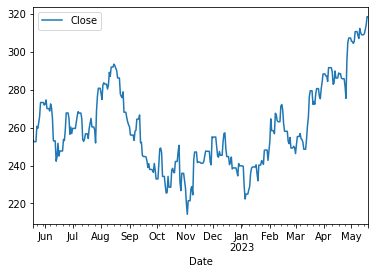

In [10]:
# To understand the pattern
data_2.plot()

In [11]:
# Testing for stationarity
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data_2)

(0.9181610302031307, True)

In [12]:
# Spliting the dataset into train and test
train, test = data_2[:int(len(data_2)*0.9)], data_2[int(len(data_2)*0.9):]

In [13]:
len(test)

37

In [14]:
train.tail()

,Close
Date,
2023-04-08,291.600006
2023-04-09,291.600006
2023-04-10,289.390015
2023-04-11,282.829987
2023-04-12,283.489990


In [15]:
test.head()

,Close
Date,
2023-04-13,289.839996
2023-04-14,286.140015
2023-04-15,286.140015
2023-04-16,286.140015
2023-04-17,288.799988


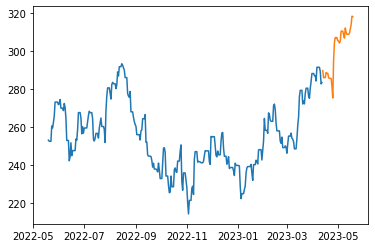

In [16]:
plt.plot(train)
plt.plot(test)

In [20]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2038.118, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1951.381, Time=0.13 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2039.773, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1932.588, Time=0.32 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1929.761, Time=0.53 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1913.567, Time=1.03 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1910.350, Time=2.07 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=15.45 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=7.90 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=1910.092, Time=1.78 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=1913.279, Time=0.67 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=inf, Time=11.05 sec
 ARIMA(0,1,0)(4,1,1)[12]             : AIC=inf, Time=6.91 sec
 ARIMA(0,1,1)(5,1,0)[12]             : AIC

In [17]:
model_autoARIMA = auto_arima(train, start_p=0, start_q=0,
test='adf',       # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1,              # frequency of series
d=None,           # let model determine 'd'
seasonal=False,   # No Seasonality
start_P=0, 
D=0, 
trace=True,
error_action='ignore',  
suppress_warnings=True, 
stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1900.129, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1900.419, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1900.125, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1898.277, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1900.632, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.229 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  329
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -948.138
Date:                Sun, 21 May 2023   AIC                           1898.277
Time:                        20:33:49   BIC                           1902.070
Sample:                    05-19-2022   HQIC                          1899.790
                         - 04-12-2023                                       

In [18]:
model = sm.tsa.arima.ARIMA(train, order=(0, 1, 0))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  329
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -948.138
Date:                Sun, 21 May 2023   AIC                           1898.277
Time:                        20:33:54   BIC                           1902.070
Sample:                    05-19-2022   HQIC                          1899.790
                         - 04-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        18.9813      0.924     20.536      0.000      17.170      20.793
Ljung-Box (L1) (Q):                   1.73   Jarque-Bera (JB):               135.10
Prob(Q):                              0.19   Pr

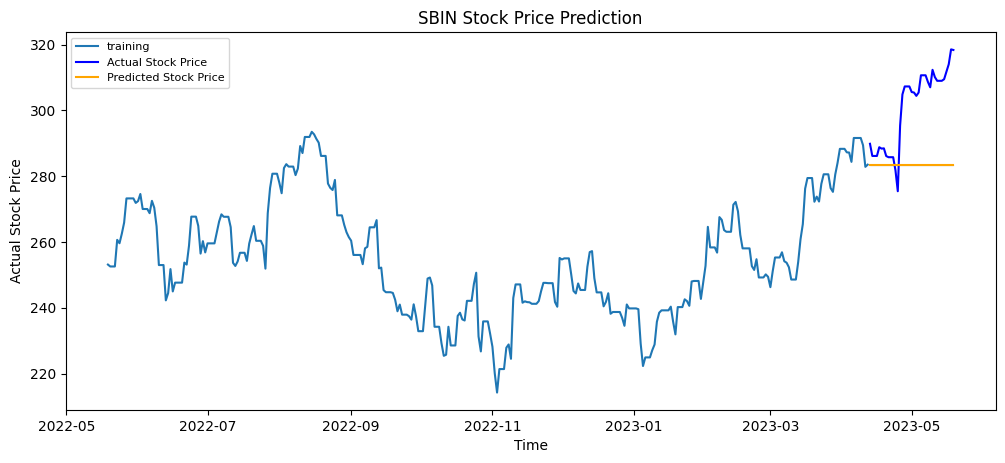

In [19]:
fc, se, conf = fitted.forecast(3, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf, index=test.index)
upper_series = pd.Series(conf, index=test.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('SBIN Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [25]:
prediction = pd.DataFrame(model_autoARIMA.predict(n_periods = 37),index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2023-04-13,283.48999
2023-04-14,283.48999
2023-04-15,283.48999
2023-04-16,283.48999
2023-04-17,283.48999
2023-04-18,283.48999
2023-04-19,283.48999
2023-04-20,283.48999
2023-04-21,283.48999


In [21]:
# Summary of the model
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  329
Model:             SARIMAX(0, 1, 1)x(5, 1, [], 12)   Log Likelihood                -948.037
Date:                             Sun, 21 May 2023   AIC                           1910.074
Time:                                     20:36:02   BIC                           1936.364
Sample:                                 05-19-2022   HQIC                          1920.577
                                      - 04-12-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0864      0.062      1.395      0.163      -0.035       0.208
ar.S.L12      -0.7382      0.055    -13.377      0.000      -0.846      -0.630
ar.S.L24      -0.4744      0.066     -7.137      0.000      -0.605      -0.344
ar.S.L36      -0.3632      0.072     -5.028      0.000      -0.505      -0.222
ar.S.L48      -0.3531      0.080     -4.392      0.000      -0.511      -0.196
ar.S.L60      -0.1415      0.058     -2.421      0.015      -0.256      -0.027
sigma2        22.8730      1.507     15.181      0.000      19.920      25.826
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                26.37
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                             0.09
Prob(H) (two-sided):                  0.23   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
prediction = pd.DataFrame(arima_model.predict(n_periods = 37),index=test.index)
prediction.columns = ['predicted_price']
prediction

,predicted_price
Date,
2023-04-13,282.310803
2023-04-14,285.004353
2023-04-15,285.773703
2023-04-16,285.699435
2023-04-17,284.199553
2023-04-18,285.795507
2023-04-19,286.384517
2023-04-20,287.365566
2023-04-21,288.140552


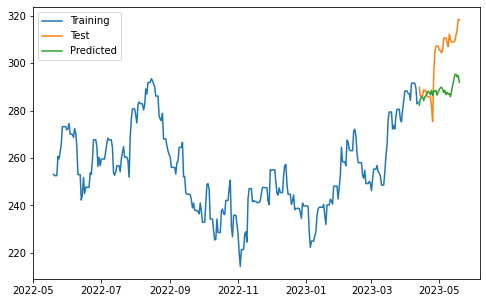

In [23]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'best')
plt.show()

In [25]:
test['predicted_price'] = prediction
r2_score(test['Close'], test['predicted_price'])

-0.8511828487619799